Here we explain the data model for the primary <a href="http://cms.web.cern.ch/">CMS</a> datasets used in many of these activities.

This activity focuses mostly on accessing the data, not explaining the physics, though some helpful links are provided in the discussion.

First we import some standard python libraries, as well as the helper code, <b><tt>cms_tools</tt></b>.

In [2]:
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
# Uncomment the following line if you want your plots to be displayed in a separate interactive window.
#%matplotlib qt 

import sys
sys.path.append("../tools/")

#from draw_objects3D import *
import cms_tools as cms

Next, we will open the file and pull out the collision data. This will return a Python <a href="https://docs.python.org/2/tutorial/datastructures.html">list</a> of all the collisions in that file.

In [3]:
infile = open('../data/small_cms_test_file.dat')
collisions = cms.get_collisions(infile)

number_of_collisions = len(collisions)
print "# of proton-proton collisions: %d" % (number_of_collisions)

# of proton-proton collisions: 10


Let's take a look at the first collision by looking at the first entry in the list of collisions.

In [16]:
print collisions[0] 
# What does the number in the bracket refer to?
# What amount of time is separating the number of proton-proton collisions?
# Why are some of the numbers negative?

[[[88.9127, 32.9767, -75.1939, 29.541, -1.0], [79.2211, -58.6558, 49.1723, 13.5915, -1.0], [43.313, -5.9129, 40.0892, 12.0431, -1.0], [274.8094, -21.4194, 27.5639, -272.4152, -1.0], [26.6201, 0.5268, -24.7563, -7.4046, 0.0]], [[15.7375, 1.4793, -15.2566, -3.5645, -1]], [], [[52.364, 17.4983, -45.4233, 19.3009], [10.2904, -1.4633, 10.0887, 1.4035]], [44.9415, 0.422]]


We see that this entry is a list of other lists! How many of these other lists are there?

In [4]:
print len(collisions[0])

5


What are these 5 entries? Each of them contains information about different particles and other physics quantities that you would want to analyze in any given proton-proton collision.

The first 4 entries contain information about (in order):
* <a href="http://en.wikipedia.org/wiki/Jet_(particle_physics)">Jets</a>
* <a href="http://en.wikipedia.org/wiki/Muon">Muons</a>
* <a href="http://en.wikipedia.org/wiki/Jet_(particle_physics)">Electrons</a>
* <a href="http://en.wikipedia.org/wiki/Photon">Photons</a> 

Each of these 4 entries is a list containting, for example, the information about each jet in the event. A particular collision will most likely have a different number of jets than the previous collision, so you need to be aware of this when you write your code.

In [17]:
print "# of jets:      %d" % (len(collisions[0][0]))
print "# of muons:     %d" % (len(collisions[0][1]))
print "# of electrons: %d" % (len(collisions[0][2]))
print "# of photons:   %d" % (len(collisions[0][3]))
# Why is 0 used?
# Does the second bracket indicate whether it's a jet, meson, electron, or photon?

# of jets:      5
# of muons:     1
# of electrons: 0
# of photons:   2


The 5th entry contains the $x$- and $y$-components for the <a href="http://en.wikipedia.org/wiki/Missing_energy">MET</a>, which refers to the missing energy in the transverse plane. Stands for missing tranverse energy.

In [21]:
METx = collisions[0][4][0]
METy = collisions[0][4][1]

print "MET x: %f" % (METx)
print "MET y: %f" % (METy)

MET x: 44.941500
MET y: 0.422000


It's easiest to access these quantities by making use of Python's syntax in accessing multiple entries of a list in one line.

In [22]:
jets,muons,electrons,photons,met = collisions[0]

Let's look at the information for each of these quantities. 

## Jets

In [23]:
E,px,py,pz,btag = jets[0]
print "E:     %8.4f" % (E) # Energy
print "px:    %8.4f" % (px) # Momentum in x-direction  
print "py:    %8.4f" % (py) # Momentum in y-direction
print "pz:    %8.4f" % (pz) # Momentum in z-direction
print "btag:  %8.4f" % (btag) # Likelihood that the jet came from a b-quark, or from a u,d,s, or c-quark
# Why use 8.4?

E:      88.9127
px:     32.9767
py:    -75.1939
pz:     29.5410
btag:   -1.0000


Those first 4 entries refer to the energy and Cartesian-components of the momentum of the jet. Collectively, this is referred to as the <a href="http://en.wikipedia.org/wiki/Four-momentum">four-momentum</a> (or four-vector) and it is the bread-and-butter of most of the analyses. 

The 5th entry is the <a href="http://en.wikipedia.org/wiki/B-tagging">b-tagging</a> variable. This quantity is related to the likelihood that the jet came from a $b$-quark (close to 1) or from a $u,d,s$ or $c$-quark (closer to 0 or -1).

## Muons or electrons

In [30]:
E,px,py,pz,q = muons[0]
print "E:  %8.4f" % (E)
print "px: %8.4f" % (px)
print "py: %8.4f" % (py)
print "pz: %8.4f" % (pz)
print "q:  %8.4f" % (q)

E:   15.7375
px:   1.4793
py: -15.2566
pz:  -3.5645
q:   -1.0000


Muons and electrons have the same data structure. The first 4 entries are the components of the four-momentum and the 5th entry is the electrical charge ($q$).

<i>Important!!!!</i>

### *While the charge of a muon or electron is an integer charge (-1 or +1), the charge is stored as a floating point number. This is to make the data extraction from the file more efficient.*

## Photons

In [29]:
E,px,py,pz = photons[0]
print "E:  %8.4f" % (E)
print "px: %8.4f" % (px)
print "py: %8.4f" % (py)
print "pz: %8.4f" % (pz)

E:   52.3640
px:  17.4983
py: -45.4233
pz:  19.3009


Photons are electrically neutral, so the only 4 entries are the components of the four-momentum.

## Missing Transverse Energy

In [11]:
METx = collisions[0][4][0]
METy = collisions[0][4][1]

print "MET x: %f" % (METx)
print "MET y: %f" % (METy)
print "MET:   %f" % (np.sqrt(METx*METx + METy*METy))

MET x: 44.941500
MET y: 0.422000
MET:   44.943481


Missing transverse energy ($M_{ET}$) is the missing energy in the transverse (x,y) plane,  where the transverse plane is measured with respect to the beamline (colliding proton beams). As such, there are only the two components for this quantity. 

Most analyses make use of the magnitude of this quantity. 

## Sample skeleton code

Here is a snippet of code that loops over some data and plots the number of jets, the energy of the jets, and the energy of the muons for each event.

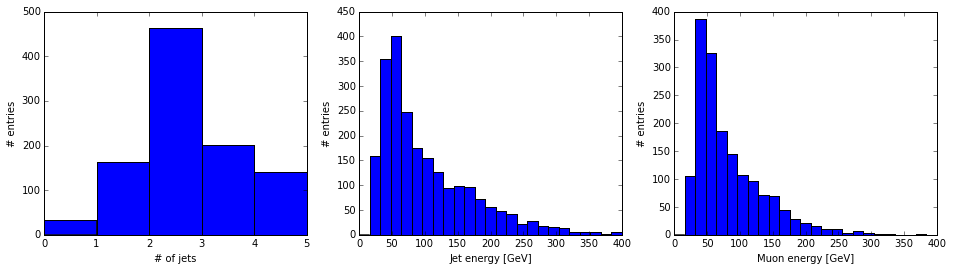

In [12]:
infile = open('../data/mc_dy_1000collisions.dat')
collisions = cms.get_collisions(infile)

# We will use these to store the quantities that we will be plotting later.
njets = []
jets_E = []
muons_E = []

for collision in collisions:
    
    jets,muons,electrons,photons,met = collision
    
    njets.append(len(jets))
    
    for jet in jets:
        E,px,py,pz,btag = jet
        jets_E.append(E)
        
    for muon in muons:
        E,px,py,pz,q = muon
        muons_E.append(E)
        
# Plot the quantities
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
plt.hist(njets,bins=5,range=(0,5))
plt.xlabel(r'# of jets')
plt.ylabel('# entries')

plt.subplot(1,3,2)
plt.hist(jets_E,bins=25,range=(0,400))
plt.xlabel(r'Jet energy [GeV]')
plt.ylabel('# entries')

plt.subplot(1,3,3)
plt.hist(muons_E,bins=25,range=(0,400))
plt.xlabel(r'Muon energy [GeV]')
plt.ylabel('# entries')